Question 5:
You are given a small collection of text documents. Use TruncatedSVD on 
a TF-IDF matrix derived from a small set of text documents to reduce the 
dimensionality of the matrix and reconstruct it.
Goals:
 Convert a set of text documents into a TF-IDF matrix using TfidfVectorizer.
 Apply TruncatedSVD to reduce the dimensionality of the TF-IDF matrix to 2 components.
 Reconstruct the original TF-IDF matrix from the reduced representation.
 Compare the reconstructed matrix with the original one to assess how much information was 
retained

In [36]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [38]:
text= ["The quick brown fox jumps over the lazy dog",
        "Never jump over the lazy dog quickly",
        "Brown foxes are quick and dogs are lazy",
        "The dog is quick and brown"]

In [7]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(text)
X_tfidf

<4x16 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [8]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_tfidf)
X_svd

array([[ 0.81967459, -0.21301446],
       [ 0.6232679 , -0.57025002],
       [ 0.4726464 ,  0.74978297],
       [ 0.75484316,  0.23268258]])

In [10]:
X_svd_reconstructed = svd.inverse_transform(X_svd)
X_svd_reconstructed

array([[ 0.13728004,  0.03369091,  0.21864935,  0.32353033,  0.01684546,
         0.16843414,  0.01684546,  0.15727687,  0.18116177,  0.16843414,
         0.23389477,  0.18116177,  0.27562543,  0.21864935,  0.18116177,
         0.43103965],
       [-0.02502565, -0.19589235,  0.08468313,  0.30354607, -0.09794618,
         0.16441435, -0.09794618,  0.06620431,  0.24494492,  0.16441435,
         0.19877094,  0.24494492,  0.32274355,  0.08468313,  0.24494492,
         0.40848962],
       [ 0.35575077,  0.49286245,  0.30042863,  0.06357871,  0.24643123,
         0.01945475,  0.24643123,  0.20479352, -0.12463994,  0.01945475,
         0.09015552, -0.12463994, -0.08292921,  0.30042863, -0.12463994,
         0.07599643],
       [ 0.26235389,  0.26369775,  0.28704021,  0.23750319,  0.13184887,
         0.11694132,  0.13184887,  0.20091377,  0.05423957,  0.11694132,
         0.19341997,  0.05423957,  0.13496097,  0.28704021,  0.05423957,
         0.31214532]])

In [11]:
mse = mean_squared_error(X_tfidf.toarray(), X_svd_reconstructed)
print(f"Difference (MSE) between original and reconstructed TF-IDF matrix: {mse}")


Difference (MSE) between original and reconstructed TF-IDF matrix: 0.01811893706802864


Q2. Perform PCA on the iris dataset to understand how much variance is 
explained by each principal component. Additionally, you must determine 
how many principal components are required to capture at least 95% of 
the total variance in the data.
Goals:
 Apply PCA to the standardized Iris dataset.
 Calculate and plot the cumulative explained variance for each principal component.
 Identify the minimum number of components needed to explain 95% of the variance.
 Visualize this with a plot that shows the cumulative explained variance

In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv("iris.csv")

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [30]:
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [31]:
pca = PCA().fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

In [33]:
pca

PCA()

In [34]:
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [35]:
cumulative_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

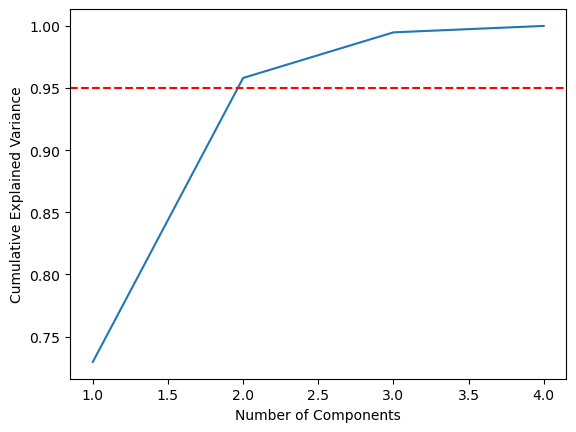

In [32]:

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

1. Use PCA to compress images from the sklearn digits dataset. Reconstruct
the images using fewer principal components and compare the results.
Goals:
Apply PCA to reduce the dimensionality of the digit images.
Reconstruct the compressed images using a selected number of components.
Compare the visual quality of the reconstructed images with the original ones using a side-by-side plot


In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [21]:

digits = load_digits()
images = digits.images
n_samples, h, w = images.shape

In [22]:
X = images.reshape(n_samples, -1)

In [23]:
n_components = 16 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

In [24]:

X_reconstructed = pca.inverse_transform(X_pca)
reconstructed_images = X_reconstructed.reshape(n_samples, h, w)

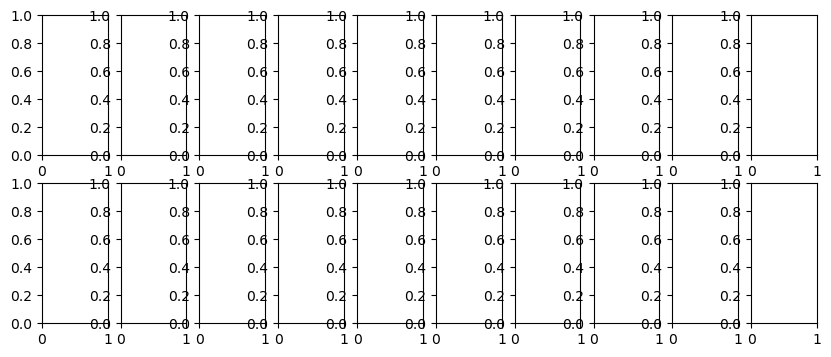

In [25]:
# Plot original and reconstructed images side by side for comparison
n_images = 10  # Number of images to display
fig, axes = plt.subplots(nrows=2, ncols=n_images, figsize=(10, 4))

In [26]:
for i in range(n_images):
    # Original images
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_title("Original")

    # Reconstructed images
    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_title(f"Reconstructed\n({n_components} components)")

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>